In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import os

file = 'G:/Mon Drive/PCO/data/'

dtypes = {
    'id_diag':int,
    'diagnostic':str,
    'generation':str,
    'statut':str
}

In [6]:
diagnostics = pd.read_csv(f'{file}/diagnostics_v2.csv', sep=';', dtype=dtypes)
diagnostics.head(5)

,id_diag,diagnostic,generation,statut
0,0,abcès,0,exclu
1,1,acrodermatite chronique atrophiante,0,Train
2,2,adénocarcinome,1,Train
3,3,adénome tubuleux,0,Train
4,4,adénome tubulovilleux,0,Train


In [7]:
def nb_word_in_diag(texte: str) -> int:
    try:
        texte_list = texte.split()
        nb_word = len(texte_list)
        return nb_word
    except:
        return 0

In [8]:
diagnostics['nb_mots'] = diagnostics.diagnostic.apply(nb_word_in_diag)
diagnostics.head(5)

,id_diag,diagnostic,generation,statut,nb_mots
0,0,abcès,0,exclu,1
1,1,acrodermatite chronique atrophiante,0,Train,3
2,2,adénocarcinome,1,Train,1
3,3,adénome tubuleux,0,Train,2
4,4,adénome tubulovilleux,0,Train,2


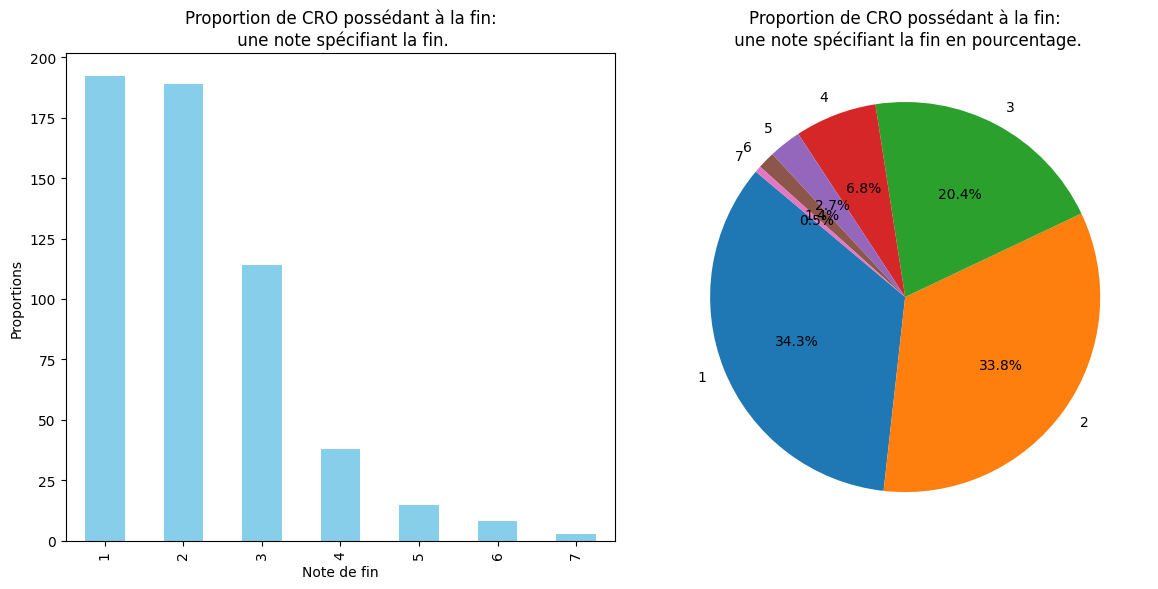

In [9]:
# Comptez les occurrences de chaque valeur dans la colonne
value_counts_nb_mot = diagnostics['nb_mots'].value_counts()

# Créez un camembert
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(value_counts_nb_mot, labels=value_counts_nb_mot.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition en pourcentage des diagnostics par nb de mots')

# Créez un graphique en barres
plt.subplot(1, 2, 1)
value_counts_nb_mot.plot(kind='bar', color='skyblue')
plt.title('Répartation des diagnostics par nb de mots ')
plt.xlabel('Note de fin')
plt.ylabel('Proportions')

plt.tight_layout()

In [10]:
index_nb_mot = diagnostics.query('nb_mots == 4').index

for index in index_nb_mot:
    print(diagnostics.diagnostic[index], '\n')

anémie réfractaire sidéroblastique idiopathique 

cancer du côlon mucineux 

cancer du côlon métastatique 

carcinome canalaire in situ 

carcinome à cellules claires 

carcinome à cellules squameuses 

carcinome à petites cellules 

dystrophie musculaire de Duchenne 

ectasie des canaux galactophores 

fibroblastome à cellules géantes 

leucémie à cellules NK 

lymphome T hépatosplénique gamma-delta 

lymphome à cellules B 

lymphome à cellules T 

maladie rénale polykystique acquise 

pityriasis rosé de Gibert 

pseudo-tumeur fibostéo-fibreuse des doigts 

rhabdomyosarcome à cellules fusiformes 

sarcome à cellules claires 

syndrome de Triple A 

syndrome de polypose juvénile 

syndrome des ovaires polykystiques 

synovialosarcome à cellules fusiformes 

tumeur angiectatique hyalinisante pléomorphe 

tumeur à cellules granuleuses 

neuropathie motrice héréditaire distale 

dystrophie musculaire de Becker 

dystrophie myotonique de steinert 

myopathie distale de Laing 

myopathie di

In [14]:
# permet de vérifier si des diagnostics ne sont pas inclus dans d'autres en nb de mots plus importants
# si c'est le cas, le statut devient "exclu"

for n in range(1, 7):
    diagnostics_inf = diagnostics.query(f'nb_mots == {n} and (statut != "Train-v1" or statut != "exclu")')
    diagnostics_inf = diagnostics_inf['diagnostic'].unique()
    diagnostics_inf = list(diagnostics_inf)

    diagnostics_sup = diagnostics.query(f'nb_mots >{n} and (statut != "Train-v1" or statut != "exclu")')
    diagnostics_sup = diagnostics_sup['diagnostic'].unique()
    diagnostics_sup = list(diagnostics_sup)

    for diag_inf in diagnostics_inf:
        for diag_sup in diagnostics_sup:
            if diag_inf in diag_sup and diag_inf != diag_sup:
                print(diag_inf, "/", diag_sup)

carcinoïde / tumeur carcinoïde
carcinome / carcinome adnexal
carcinome / carcinome basocellulaire
carcinome / carcinome basosquameux
carcinome / carcinome canalaire in situ
carcinome / carcinome mucineux
carcinome / carcinome myoépithélial
carcinome / carcinome médullaire
carcinome / carcinome papillaire
carcinome / carcinome sarcomatoïde
carcinome / carcinome spinocellulaire
carcinome / carcinome squirrheux
carcinome / carcinome sébacé
carcinome / carcinome tubuleux
carcinome / carcinome à cellules claires
carcinome / carcinome à cellules de Merkel
carcinome / carcinome à cellules squameuses
carcinome / carcinome à petites cellules
carcinome / carcinome épidermoïde
carcinome / carcinome fibrolamellaire
carcinome / carcinome pléomorphe
carcinome / carcinome hépatocellulaire
colite / colite allergique
colite / colite auto-immune
colite / colite chimique
colite / colite diverticulaire
colite / colite indéterminée
colite / colite infectieuse
colite / colite ischémique
colite / colite lymp

In [205]:
# import spacy

# nlp = spacy.load("fr_core_news_lg")

# doc1 = nlp("En conclusion, l'examen histopathologique permet de diagnostiquer un carcinome épidermoïde (TNM : T2aN0M0) chez Mme Catherine Fleury. Cette tumeur est malignement maligne et nécessite un traitement adapté pour assurer une bonne pronostic")
# doc2 = nlp("En conclusion, l'examen histopathologique permet de diagnostiquer une tumeur carcinoïde du côlon de stadium T1N1M0. Cette tumeur est composée de cellules épithéliales malades qui envahissent la musculature de la paroi digestive, sans atteindre la couche musculaire. Les ganglions lymphatiques régionaux sont atteints, mais il n'y a pas de métastases régionales. Ce diagnostic permettra de guider les traitements ultérieurs pour la patiente.")
# # Obtiens la similarité entre doc1 et doc2
# similarity = doc1.similarity(doc2)
# print(similarity)

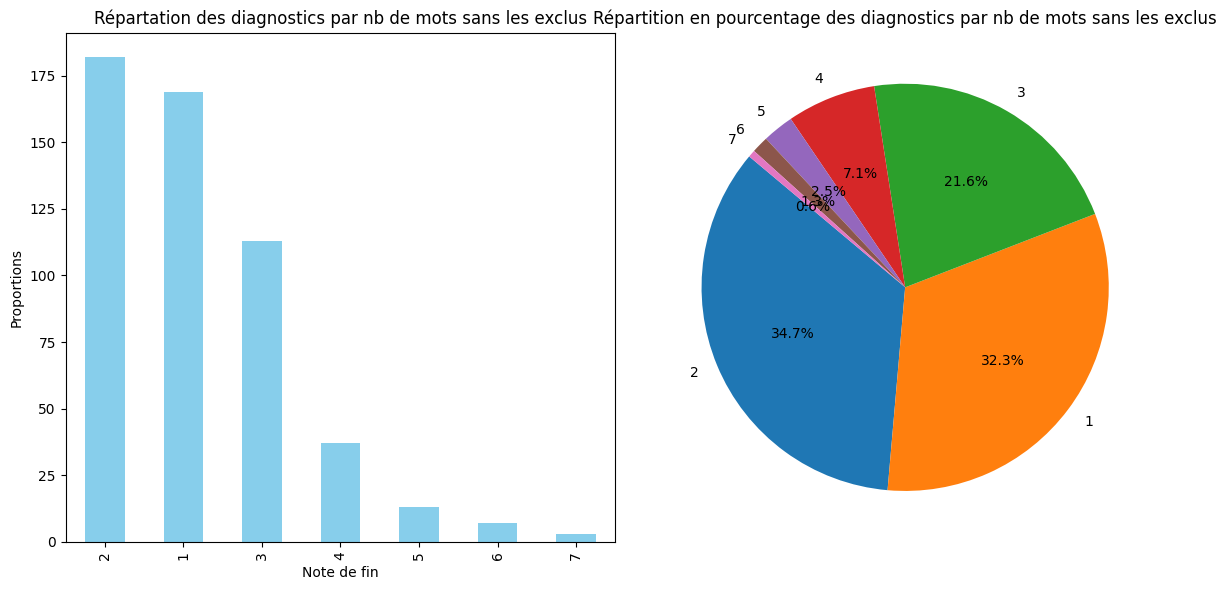

In [16]:
# Comptez les occurrences de chaque valeur dans la colonne
value_counts_nb_mot = diagnostics.query('statut != "exclu"')['nb_mots'].value_counts()

# Créez un camembert
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.pie(value_counts_nb_mot, labels=value_counts_nb_mot.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition en pourcentage des diagnostics par nb de mots sans les exclus')

# Créez un graphique en barres
plt.subplot(1, 2, 1)
value_counts_nb_mot.plot(kind='bar', color='skyblue')
plt.title('Répartation des diagnostics par nb de mots sans les exclus')
plt.xlabel('Note de fin')
plt.ylabel('Proportions')

plt.tight_layout()

In [12]:
# Répartition des diagnostics entre Train et Test en 80/20

exclu_data = diagnostics.query('statut != "Train"')
df = pd.DataFrame()
for n in range(1, 8):
    train_test_data_sample = diagnostics.sample(frac=1).reset_index(drop=True)
    train_test_data = train_test_data_sample.query(f'nb_mots == {n} and statut == "Train"')

    index_ref = round(0.8 * len(train_test_data))
    train_data = train_test_data[: index_ref]
    test_data = train_test_data[index_ref :]

    test_data['statut'] = 'Test'

    df = pd.concat([df, train_data, test_data])

df = pd.concat([df, exclu_data])
df = df.sort_values(by='id_diag', ascending=True).reset_index(drop=True)
    

C:\Users\utilisateur\AppData\Local\Temp\ipykernel_12432\2368690415.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['statut'] = 'Test'


In [13]:
df.to_csv('test.csv', index=False, sep=';')

In [17]:
def send_to_SQL(db_table, df):
    # Paramètres de connexion à la base de données MySQL
    db_username = os.getenv('DB_USER')
    db_password = os.getenv('DB_PASSWORD')
    db_host = os.getenv('DB_HOST')
    db_port = os.getenv('DB_PORT')
    db_database = os.getenv('DB_DATABASE')

    # Créer une connexion à la base de données MySQL avec SQLAlchemy
    engine = create_engine(f"mysql+pymysql://{db_username}:{db_password}@{db_host}:{db_port}/{db_database}")

    # # Envoyer le DataFrame en tant que table MySQL
    df.to_sql(name=db_table, con=engine, index=False, if_exists='replace')

    # Récupérer les données de la table MySQL
    query = f"SELECT * FROM {db_table}"
    df_from_mysql = pd.read_sql(query, con=engine)

    # Afficher le DataFrame récupéré depuis MySQL
    print("DataFrame récupéré depuis MySQL:")
    print(df_from_mysql)

In [18]:
# envoie dans la base de donnée
send_to_SQL('diagnostics_v2', df)

DataFrame récupéré depuis MySQL:
     id_diag                           diagnostic generation statut  nb_mots
0          0                                abcès          0  exclu        1
1          1  acrodermatite chronique atrophiante          0   Test        3
2          2                       adénocarcinome          1  Train        1
3          3                     adénome tubuleux          0  Train        2
4          4                adénome tubulovilleux          0   Test        2
..       ...                                  ...        ...    ...      ...
554      554                    prurigo nodulaire          0  Train        2
555      555                      eczéma atopique          0  Train        2
556      556           polyangéite granulomateuse          0  Train        2
557      557                           sarcoïdose          0  Train        1
558      558             polyarthrite psoriasique          0  Train        2

[559 rows x 5 columns]
